In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

El siguiente código realiza un estudio de regresión lineal, en el que nos ayuda a generar un sistema de predicción para una variable dependiente en base a varias independientes. 
Utilizaremos la base de datos de Credicel, con las variables numéricas relacionadas con el valor monetario.

In [290]:
df=pd.read_csv('basesocio.csv')
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
mm=df[['enganche', 'precio','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado', 'porc_enganche']]
mm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enganche          22735 non-null  float64
 1   precio            22735 non-null  float64
 2   costo_total       22735 non-null  int64  
 3   pagos_realizados  22735 non-null  int64  
 4   riesgo            22735 non-null  float64
 5   plazo_sem         22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   porc_enganche     22735 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


En el siguiente mapa podemos observar variables como enganche, precio, costo total y monto financiado tiene varias correlaciones fuertes entre las variables, mientras algunas como plazo semanal, riesgo, pagos realizados y porcentaje de enganche tienen una relación considerable con una variable, por lo tanto, es más recomendado utilizar regresiones simples para estas opciones. 

<Axes: >

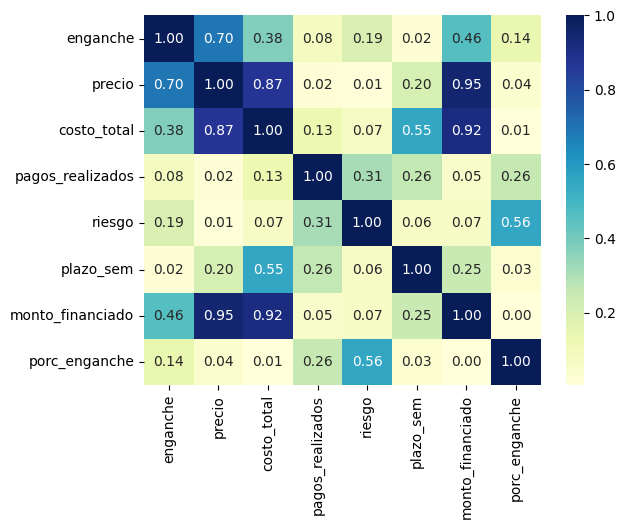

In [178]:

Corr_Factors=mm.corr()
Corr_Factors

Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

Buscaremos la mejor propuesta con las variables correlacionadas como dependientes e incluiremos todas las dempas como dependientes.

Propuesta 1, precio dependiente y todas las demás independientes


In [179]:
Vars_Indep= df[['enganche','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado', 'porc_enganche']]
Var_Dep= df['precio']

In [180]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [181]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [182]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche', 'costo_total', 'pagos_realizados', 'riesgo',
        'plazo_sem', 'monto_financiado', 'porc_enganche'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([  0.9792775 ,   0.1973329 ,   0.40719309,  -0.02344333,
        -16.44653812,   0.63492438,  -0.40204539]),
 'rank_': 7,
 'singular_': array([392015.81659965,  70983.41254897,  52578.35956483,   3585.16504353,
          1352.93921106,    767.87629766,    708.81818996]),
 'intercept_': 434.02809241998784}

In [183]:
model.score(Vars_Indep,Var_Dep)

0.9942360546476222

In [184]:
Vars_Indep1= df[['enganche','costo_total','riesgo','plazo_sem','monto_financiado', 'porc_enganche']]
Var_Dep1= df['precio']

In [185]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [186]:
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [187]:
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche', 'costo_total', 'riesgo', 'plazo_sem',
        'monto_financiado', 'porc_enganche'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([  0.97910391,   0.19739309,  -0.06034933, -16.354914  ,
          0.63476241,  -0.4842867 ]),
 'rank_': 6,
 'singular_': array([392015.77808148,  70982.81241745,  52578.30571619,   3555.27596108,
           777.99840977,    713.39389959]),
 'intercept_': 436.54779288404234}

In [188]:
model1.score(Vars_Indep1,Var_Dep1)

0.9942290116479056

In [189]:
y_pred= model.predict(X=df[['enganche','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado', 'porc_enganche']])
y_pred

array([1927.87784525, 3062.94441852, 2068.87867534, ..., 4784.33655578,
       9955.37812836, 5333.36230998])

In [190]:
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,1927.877845,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,3062.944419,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,2068.878675,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,2068.692301,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,4262.217558,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,3306.370497,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,4044.212165,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,4784.336556,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,9955.378128,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


In [191]:
nr=df[['Predicciones','precio']]
nr

,Predicciones,precio
0,1927.877845,1949.0
1,3062.944419,2999.0
2,2068.878675,1959.0
3,2068.692301,1959.0
4,4262.217558,4299.0
...,...,...
22730,3306.370497,3349.0
22731,4044.212165,4100.0
22732,4784.336556,4849.0
22733,9955.378128,9799.0


<Axes: xlabel='costo_total', ylabel='precio'>

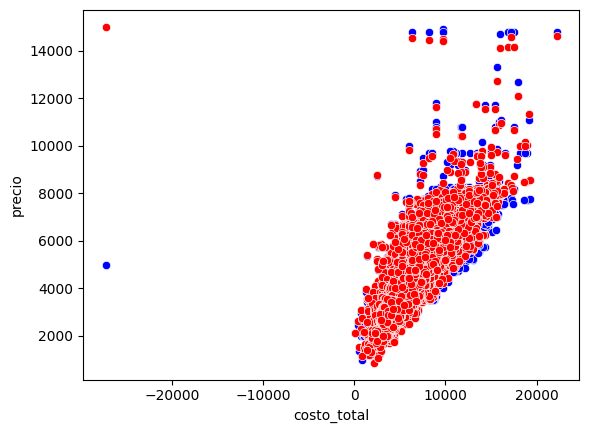

In [192]:
sns.scatterplot(x='costo_total', y='precio', color="blue", data=df)
sns.scatterplot(x='costo_total', y='Predicciones', color="red", data=df)

Propuesta 2: enganche como variable dependiente


In [193]:
Vars_Indep2= df1[['precio','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado', 'porc_enganche']]
Var_Dep2= df1['enganche']

In [194]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [195]:
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [196]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'pagos_realizados', 'riesgo', 'plazo_sem',
        'monto_financiado', 'porc_enganche'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([ 0.95304625, -0.19262904, -0.44437072,  0.28681626, 15.80748717,
        -0.58279319,  0.49428566]),
 'rank_': 7,
 'singular_': array([433922.4809412 ,  95472.94465973,  36331.55898857,   3591.58678472,
          1352.24425845,    755.66794003,    708.80690041]),
 'intercept_': -400.1550767358973}

In [197]:
model2.score(Vars_Indep2,Var_Dep2)

0.9517335914356435

In [198]:
Vars_Indep3= df1[['precio','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado']]
Vars_Dep3= df1['enganche']

In [199]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [211]:
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [212]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'pagos_realizados', 'riesgo', 'plazo_sem',
        'monto_financiado'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ 0.9531318 , -0.19256644, -0.47302836,  0.34848892, 15.80804286,
        -0.5829299 ]),
 'rank_': 6,
 'singular_': array([433922.48093567,  95472.91845246,  36331.38886953,   3559.66268968,
          1350.79187105,    755.56731416]),
 'intercept_': -400.3706108002863}

In [213]:
model3.score(Vars_Indep3,Vars_Dep3)

0.9517080160889623

In [215]:
y_pred= model2.predict(X=df[['precio','costo_total','pagos_realizados','riesgo','plazo_sem','monto_financiado', 'porc_enganche']])
y_pred

array([ 783.64493675,  966.50430047,  390.52650022, ..., 1211.76327421,
       2571.28688693, 1159.46837681])

In [216]:
df1.insert(0, 'Predicciones', y_pred)
df1

ValueError: cannot insert Predicciones, already exists

<Axes: xlabel='precio', ylabel='enganche'>

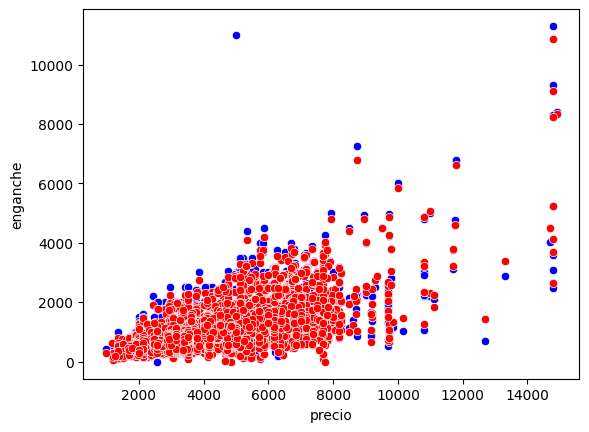

In [207]:
sns.scatterplot(x='precio', y='enganche', color="blue", data=df1)
sns.scatterplot(x='precio', y='Predicciones', color="red", data=df1)

Propuesta 3: variable costo_total como dependiente

In [224]:
Vars_Indep4= df2[['precio','enganche','pagos_realizados','riesgo','plazo_sem','monto_financiado']]
Vars_Dep4= df2['costo_total']

In [225]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [226]:
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [227]:
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'enganche', 'pagos_realizados', 'riesgo', 'plazo_sem',
        'monto_financiado'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ 2.4555589 , -2.46256623, -0.86372693,  0.82972554, 83.21137538,
        -0.61188252]),
 'rank_': 6,
 'singular_': array([263841.15543616,  66533.4331327 ,  12661.86690353,   3552.9947698 ,
          1582.71272195,   1223.38812178]),
 'intercept_': -2107.2076922763217}

In [228]:
model4.score(Vars_Indep4,Vars_Dep4)

0.9766290132510724

In [231]:
Vars_Indep5= df2[['precio','pagos_realizados','riesgo','plazo_sem','monto_financiado']]
Vars_Dep5= df2['costo_total']

In [229]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [232]:
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [233]:
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'pagos_realizados', 'riesgo', 'plazo_sem',
        'monto_financiado'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 2.06181600e-01,  5.72729347e-01, -5.41116513e-02,  8.42214991e+01,
         1.56643761e+00]),
 'rank_': 5,
 'singular_': array([260175.38878067,  40126.00348544,   3562.31757676,   1584.5429695 ,
          1223.43976584]),
 'intercept_': -2132.5309727856975}

In [235]:
model5.score(Vars_Indep5,Vars_Dep5)

0.9555509219633807

In [238]:
y_pred= model4.predict(X=df[['precio','enganche','pagos_realizados','riesgo','plazo_sem','monto_financiado']])
y_pred

array([ 2212.67635092,  2567.10406483,  1679.46719173, ...,
        6873.41416514, 14035.77321719,  8010.41102215])

In [239]:
df2.insert(0, 'Predicciones', y_pred)
df2

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,2212.676351,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,2567.104065,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,1679.467192,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,1686.063510,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,7074.515703,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,5689.404445,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,5385.352137,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,6873.414165,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,14035.773217,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


<Axes: xlabel='precio', ylabel='costo_total'>

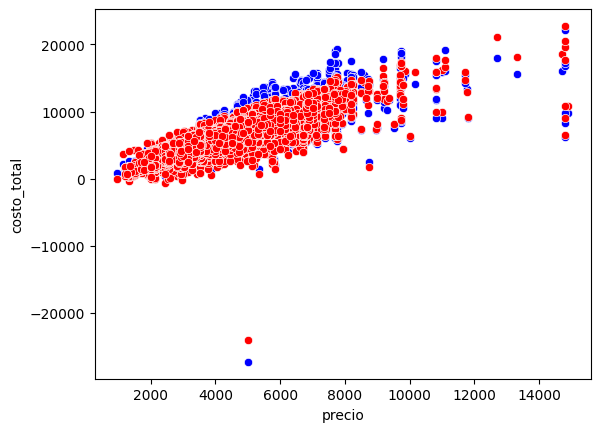

In [241]:
sns.scatterplot(x='precio', y='costo_total', color="blue", data=df2)
sns.scatterplot(x='precio', y='Predicciones', color="red", data=df2)

Propuesta 4: pagos realizados como variable dependiente

In [259]:
Vars_Indep6= df3[['precio','costo_total','riesgo','plazo_sem','monto_financiado']]
Vars_Dep6= df3['pagos_realizados']

In [260]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [264]:
model6.fit( X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [265]:
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'riesgo', 'plazo_sem', 'monto_financiado'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([-2.44084381e-04,  1.80385860e-04, -1.18206735e-01,  2.23634104e-01,
        -2.89477729e-04]),
 'rank_': 5,
 'singular_': array([433922.45591955,  95472.37052613,  36331.38857459,   3530.71024514,
           764.45325048]),
 'intercept_': 6.397126970974368}

In [267]:
model6.score(Vars_Indep6,Vars_Dep6)

0.15444053108463773

In [284]:
Vars_Indep7= df3[['riesgo','plazo_sem']]
Vars_Dep7= df3['pagos_realizados']

In [285]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [286]:
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [287]:
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['riesgo', 'plazo_sem'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.1185008 ,  0.23285282]),
 'rank_': 2,
 'singular_': array([3651.92103099, 1502.54018423]),
 'intercept_': 5.322860382306796}

In [288]:
model7.score(Vars_Indep7,Vars_Dep7)

0.15350559677037456

Variable dependiente= riesgo

In [307]:
Vars_Indep8= df3[['precio','costo_total','pagos_realizados','plazo_sem','monto_financiado']]
Vars_Dep8= df3['riesgo']

In [308]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [309]:
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [310]:
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'pagos_realizados', 'plazo_sem',
        'monto_financiado'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 1.25364165e-02, -1.07016057e-04, -7.42245070e-01,  1.31738520e-01,
        -1.60652966e-02]),
 'rank_': 5,
 'singular_': array([433922.43651646,  95471.82697894,  36322.9483065 ,   1424.34932602,
           756.39272003]),
 'intercept_': 14.002619322437958}

In [311]:
model8.score(Vars_Indep8,Vars_Dep8)

0.146262220985115

In [312]:
Vars_Indep9= df3[['precio','costo_total','pagos_realizados','monto_financiado']]
Vars_Dep9= df3['riesgo']

In [302]:
from sklearn.linear_model import LinearRegression
model9= LinearRegression()

In [303]:
model9.fit(X=Vars_Indep9, y=Vars_Dep9)

LinearRegression()

In [304]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'pagos_realizados', 'monto_financiado'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.01224562,  0.00100334, -0.7335351 , -0.01764992]),
 'rank_': 4,
 'singular_': array([433921.90043136,  95466.16629565,  36321.05366219,   1420.02851807]),
 'intercept_': 17.037479117146653}

In [313]:
model9.score(Vars_Indep9,Vars_Dep9)

0.14551240188677128

Variable dependiente: monto financiado

In [315]:
Vars_Indep10= df3[['precio','costo_total','pagos_realizados','plazo_sem','riesgo']]
Vars_Dep10= df3['monto_financiado']

In [314]:
from sklearn.linear_model import LinearRegression
model10= LinearRegression()

In [316]:
model10.fit(X=Vars_Indep10, y=Vars_Dep10)

LinearRegression()

In [317]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio', 'costo_total', 'pagos_realizados', 'plazo_sem', 'riesgo'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([  0.31084224,   0.32032093,  -0.18794653, -24.35772733,
         -1.66112686]),
 'rank_': 5,
 'singular_': array([404473.17902324,  89253.69416926,   3628.41162671,   1366.20291512,
           890.89716084]),
 'intercept_': 658.7786133479781}

In [318]:
model10.score(Vars_Indep10,Vars_Dep10)

0.9566850773459905

In [319]:
y_pred= model10.predict(X=df[['precio','costo_total','pagos_realizados','plazo_sem','riesgo']])
y_pred

array([1292.69913908, 2198.07678417, 1658.97735155, ..., 3646.53540956,
       7553.62579494, 4173.95630958])

In [320]:
df3.insert(0, 'Predicciones', y_pred)
df3

,Predicciones,Unnamed: 0,folio,folio_solicitud,semana,costo_total,status,fraude,inversion,pagos_realizados,...,agente_venta,dis_venta,empresa,status_cuenta,razones_buro,semana_actual,codigo_postal,fecha,fecha_ultimo_pago,fecha_pago_proximo
0,1292.699139,0,3,30,81,2106,2,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,0,12/11/21 19:00,desconocido,desconocido
1,2198.076784,1,4,33,225,2925,2,0,0,0,...,Alvaro Rafael Pascual,mic015,microtec,No determinado,0,0,0,12/11/21 19:15,desconocido,desconocido
2,1658.977352,2,5,37,170,2210,3,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,No determinado,0,0,No identificable,13/11/21 14:13,desconocido,desconocido
3,1645.771393,3,6,38,170,2210,2,0,0,0,...,Luz Aylin Hernandez Lopez1,mic0748,microtec,No determinado,0,0,0,13/11/21 15:45,desconocido,desconocido
4,3268.805903,4,7,44,178,6942,1,0,0,0,...,Sintia Verenice Tenorio Perez E,mic0437,microtec,Mora,Desconocido,Faltante,74,13/11/21 16:10,05/03/22 0:00,12/03/22 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,2807.157694,22730,22967,96502,211,5486,1,0,0,0,...,Mildred Asuncion Arguello Caamal,svc044,servicel,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:45,18/04/23 18:45,25/04/23 0:00
22731,2950.649558,22731,22968,96479,200,5200,1,0,0,0,...,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,No determinado,0,"K0,J0,D8,E2",0,18/04/23 18:46,18/04/23 18:46,25/04/23 0:00
22732,3646.535410,22732,22969,96442,256,6656,1,0,0,0,...,Nicol·s JimÈnez S·nchez,gph008,Desconocido,No determinado,0,"K0,D7,F7,D8",0,18/04/23 18:47,18/04/23 18:47,25/04/23 0:00
22733,7553.625795,22733,22970,96536,386,15054,1,0,0,0,...,Maribel Ulibarri Medina,gph014,grupoph,No determinado,0,"J0,G1,E0,E2",0,18/04/23 18:49,18/04/23 18:49,25/04/23 0:00


<Axes: xlabel='precio', ylabel='monto_financiado'>

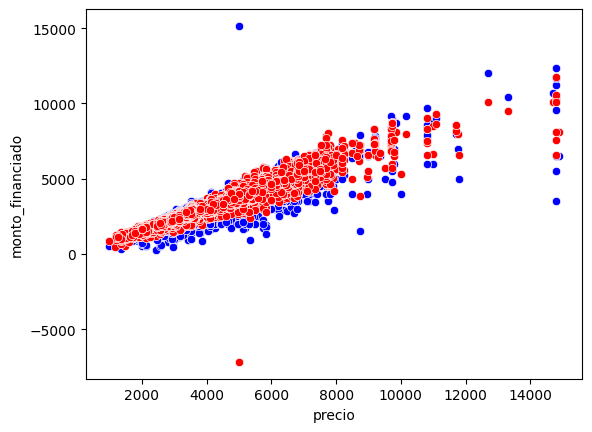

In [321]:
sns.scatterplot(x='precio', y='monto_financiado', color="blue", data=df3)
sns.scatterplot(x='precio', y='Predicciones', color="red", data=df3)

Tenemos como conclusión que el mejor modelo para predecir los datos futuros es con precio como variable dependiente y todas las variables incluidas en el modelo como independientes, de esta forma, con un coeficiente de determinación de 0.99 el modelo de precio genera las mejores predicciones tomando en cuenta las demás variables.